In [1]:
import numpy as np
import pandas as pd

In [3]:
ipl_data = pd.read_excel('../input/DIM_MATCH.xlsx')

In [4]:
ipl_data.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1


In [5]:
#info about the data
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
Match_SK        637 non-null int64
match_id        637 non-null int64
Team1           637 non-null object
Team2           637 non-null object
match_date      637 non-null datetime64[ns]
Season_Year     637 non-null int64
Venue_Name      636 non-null object
City_Name       637 non-null object
Country_Name    637 non-null object
Toss_Winner     636 non-null object
match_winner    634 non-null object
Toss_Name       636 non-null object
Win_Type        635 non-null object
Outcome_Type    637 non-null object
ManOfMach       633 non-null object
Win_Margin      628 non-null float64
Country_id      637 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(11)
memory usage: 84.7+ KB


In [6]:
#To chechk whether any null values are present
ipl_data.isnull().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      1
City_Name       0
Country_Name    0
Toss_Winner     1
match_winner    3
Toss_Name       1
Win_Type        2
Outcome_Type    0
ManOfMach       4
Win_Margin      9
Country_id      0
dtype: int64

In [8]:
#Remove the rows with null values
ipl_data = ipl_data.dropna(axis=0,how='any')
ipl_data.isnull().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      0
City_Name       0
Country_Name    0
Toss_Winner     0
match_winner    0
Toss_Name       0
Win_Type        0
Outcome_Type    0
ManOfMach       0
Win_Margin      0
Country_id      0
dtype: int64

In [11]:
ipl_data.shape

(626, 17)

In [12]:
ipl_data.columns

Index(['Match_SK', 'match_id', 'Team1', 'Team2', 'match_date', 'Season_Year',
       'Venue_Name', 'City_Name', 'Country_Name', 'Toss_Winner',
       'match_winner', 'Toss_Name', 'Win_Type', 'Outcome_Type', 'ManOfMach',
       'Win_Margin', 'Country_id'],
      dtype='object')

In [13]:
#Total number of matches played
ipl_data.Match_SK.count()

626

In [14]:
#Team with maximium win-margin
ipl_data.loc[ipl_data['Win_Margin'].idxmax()]

Match_SK                        621
match_id                    1082635
Team1              Delhi Daredevils
Team2                Mumbai Indians
match_date      2017-05-06 00:00:00
Season_Year                    2017
Venue_Name         Feroz Shah Kotla
City_Name                     Delhi
Country_Name                  India
Toss_Winner        Delhi Daredevils
match_winner         Mumbai Indians
Toss_Name                     Field
Win_Type                       runs
Outcome_Type                 Result
ManOfMach               LMP Simmons
Win_Margin                      146
Country_id                        1
Name: 75, dtype: object

In [15]:
#To get the Team
ipl_data.loc[ipl_data['Win_Margin'].idxmax()]['match_winner']

'Mumbai Indians'

In [17]:
#Team with minimum win-margin
ipl_data.loc[ipl_data['Win_Margin'].idxmin()]['match_winner']

'Royal Challengers Bangalore'

*****Now let's do some vizualisations****

****

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

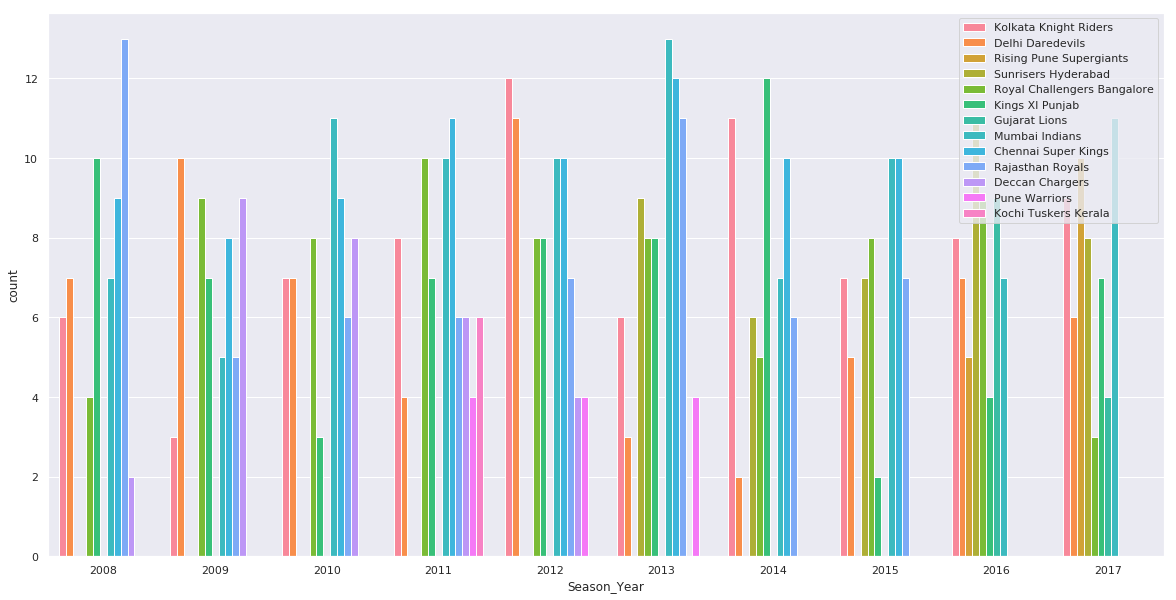

In [22]:
#Teams won most number of matches in every ipl season
plt.figure(figsize=(20,10))
sns.countplot(x='Season_Year', data= ipl_data,hue='match_winner',saturation=1)
plt.legend(loc=1)
plt.show()

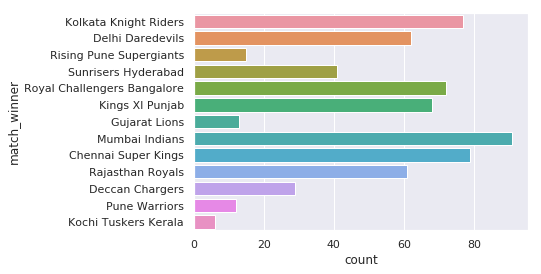

In [24]:
#maximun number of matches won by team in ipl
sns.countplot(y='match_winner',data=ipl_data)
plt.show()

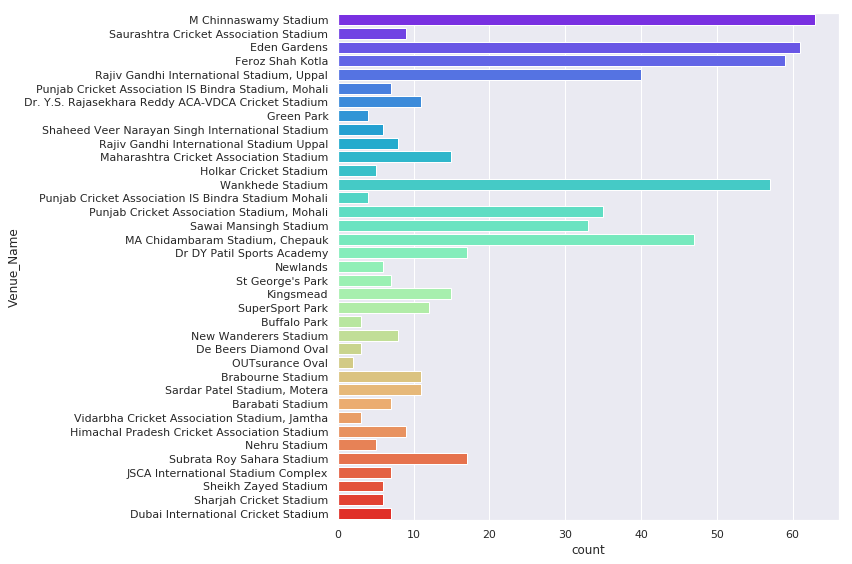

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(y='Venue_Name',data=ipl_data,palette='rainbow')
plt.tight_layout()

In [26]:
# Highest Man of the matches in ipl
top_player = ipl_data.ManOfMach.value_counts()[:10]

In [27]:
top_player

CH Gayle          18
DA Warner         15
AB de Villiers    15
YK Pathan         15
RG Sharma         14
SK Raina          14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: ManOfMach, dtype: int64

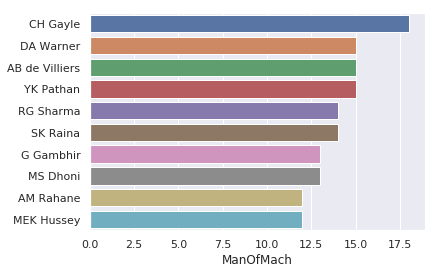

In [28]:
sns.barplot(x=top_player,y=top_player.index)
plt.show()

In [29]:
#Teams won the match with win margin
ipl_data[ipl_data['Win_Margin']>0].groupby(['match_winner'])['Win_Margin'].apply(np.median).sort_values(ascending=False)

match_winner
Deccan Chargers                10.0
Chennai Super Kings            10.0
Rising Pune Supergiants         9.0
Sunrisers Hyderabad             8.0
Royal Challengers Bangalore     8.0
Rajasthan Royals                8.0
Mumbai Indians                  8.0
Kolkata Knight Riders           8.0
Kochi Tuskers Kerala            7.5
Delhi Daredevils                7.5
Pune Warriors                   7.0
Kings XI Punjab                 7.0
Gujarat Lions                   6.0
Name: Win_Margin, dtype: float64

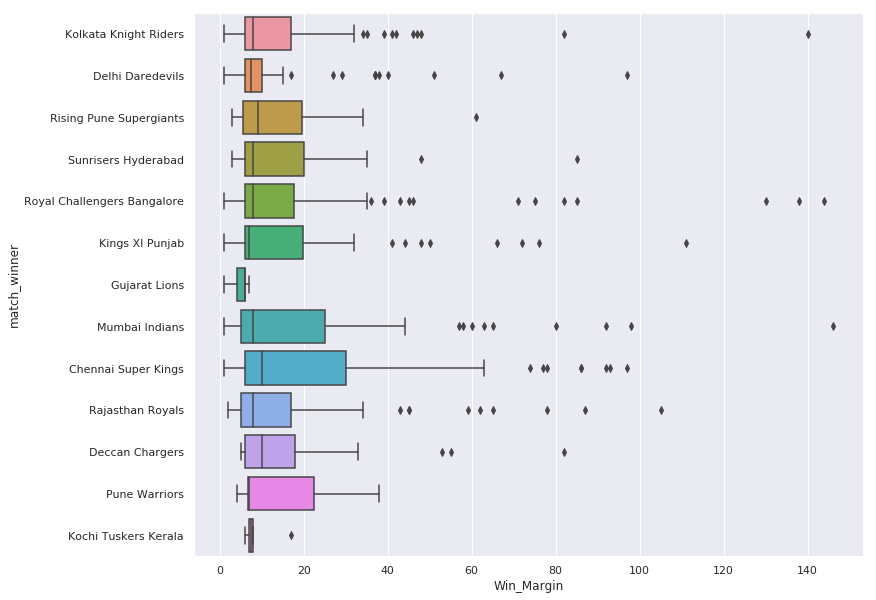

In [30]:
plt.figure(figsize=(12,10))
sns.boxplot(y='match_winner',x='Win_Margin',data=ipl_data[ipl_data['Win_Margin']>0],orient='h')
plt.show()